# <center> Лабораторная работы №1
## <center>Низкочастотный электронный парамагнитный резонанс

In [1]:
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

### <center>Данные

1 Даные для калибровки развертки

In [2]:
calib_ras_data = {
    16:15,
    18:27,
    20:31,
    22:38,
    24:47
}

2 Данные для построение зависимоти Амплитуды и Ширины линии  от Амплитуды модуляции

In [3]:
had_0 = {
    'A': [[0.1, 0.3, 1.0, 3.0], [3, 9, 28, 43]],
    'd_0.5': [[0.1, 0.3, 1.0, 3.0], [17, 17, 23, 25]]
}

3 Данные для построение зависимоти Амплитуды и Ширины линии для второй производной от Амплитуды модуляции

In [4]:
had_2 = {
    'A': [[0.1, 0.3, 1.0, 3.0], [0, 0, 8, 33]],
    'd_0.5': [[0.1, 0.3, 1.0, 3.0], [None, None, 10, 16]]
}

4 Данные для построение зависимоти Амплитуды и Ширины линии от Постоянной времени

In [5]:
tad_0 = {
    'A': [[0.1, 0.3, 1.0, 3.0, 10], [43, 37, 21, 0, 0]],
    'd_0.5': [[0.1, 0.3, 1.0, 3.0, 10], [25, 27, 28, None, None]]
}

5 Данные для построение зависимоти Амплитуды и Ширины линии для второй производной от Постоянной времени

In [6]:
tad_2 = {
    'A': [[0.1, 0.3, 1.0, 3.0, 10], [33, 28, 14, 5, 0]],
    'd_0.5': [[0.1, 0.3, 1.0, 3.0, 10], [18, 19, 20, 21, None]]
}

### <center>Калибровка развертки

In [7]:
def lin(i, slope, intercept):
    return slope*i+intercept

def graphic(x, y, x_label='x', y_label = 'y', title='title', ax = None):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.scatter(x,y, color='cyan', label = 'reg points')
    lin_x = [min(x), max(x)]
    lin_y = []
    for i in lin_x:
        lin_y.append(lin(i, slope, intercept))
    ax.plot(lin_x, lin_y, color='blue', label = 'reg line')
    ax.set_title(str(title))
    ax.set_xlabel(str(x_label))
    ax.set_ylabel(str(y_label))
    fig.savefig('output/calibr.png')
    return ax, slope, intercept

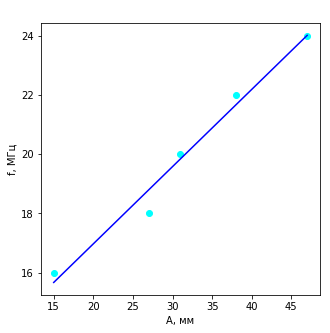

In [8]:
x = []
y = []

for i in calib_ras_data:
    y.append(i)
    x.append(calib_ras_data[i])
ax, s, inter = graphic(x, y, x_label='A, мм', y_label = 'f, МГц', title=' ', ax = None);

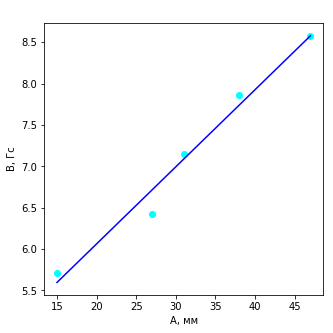

In [9]:
x = []
y = []

for i in calib_ras_data:
    y.append(i/2.8)
    x.append(calib_ras_data[i])
ax, s, inter = graphic(x, y, x_label='A, мм', y_label = 'B, Гс', title=' ', ax = None);

In [10]:
def mag_interpol(x):
    return lin(x, s, inter)

### <center> Зависимость амплитуды и ширины на полувысоте от Амплитуды модуляции

In [11]:
def graphic_spline(x, y, x_label='x', y_label = 'y', title='title', ax = None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.scatter(x,y, color='blue')

    ax.plot(x, y, color='cyan')
    ax.set_xlabel(str(x_label))
    ax.set_ylabel(str(y_label))
    fig.savefig('output/'+title+'.png')
    return ax

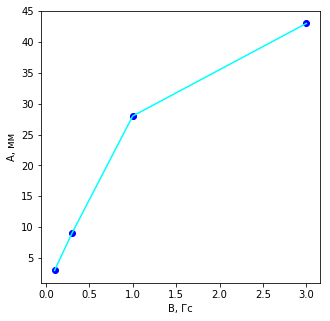

In [12]:
graphic_spline(had_0['A'][0],had_0['A'][1], x_label='B, Гс', y_label = 'A, мм', title='Амплитуда от Амплитуды модуляции');

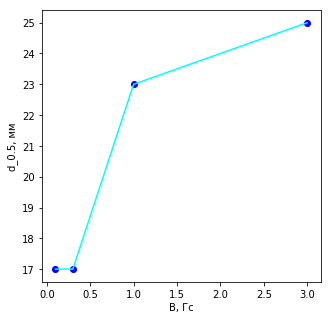

In [13]:
graphic_spline(had_0['d_0.5'][0],had_0['d_0.5'][1], x_label='B, Гс', y_label = 'd_0.5, мм', title='Ширина от Амплитуды модуляции');

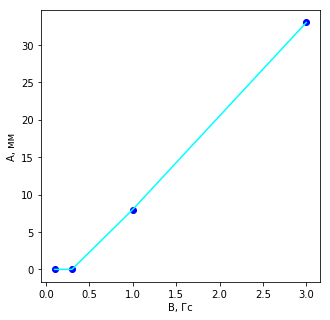

In [14]:
graphic_spline(had_2['A'][0],had_2['A'][1], x_label='B, Гс', y_label = 'A, мм', title='Амплитуда II производной от Амплитуды модуляции');

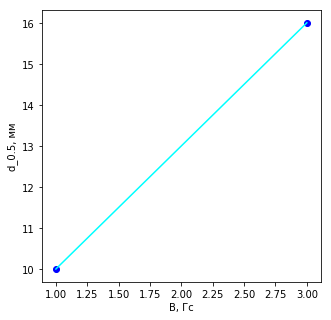

In [15]:
graphic_spline(had_2['d_0.5'][0],had_2['d_0.5'][1], x_label='B, Гс', y_label = 'd_0.5, мм', title='Ширина II производной от Амплитуды модуляции');

### <center> Зависимость амплитуды и ширины на полувысоте отпостоянной интегрирования

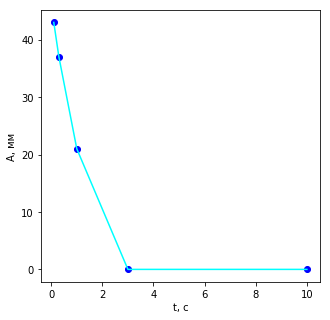

In [16]:
graphic_spline(tad_0['A'][0],tad_0['A'][1], x_label='t, с', y_label = 'A, мм', title='Амплитуда от постоянной времени');

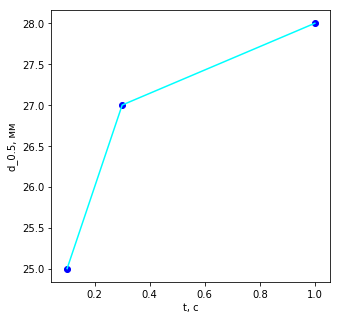

In [17]:
graphic_spline(tad_0['d_0.5'][0],tad_0['d_0.5'][1], x_label='t, с', y_label = 'd_0.5, мм', title='Ширина производной от постоянной времени');

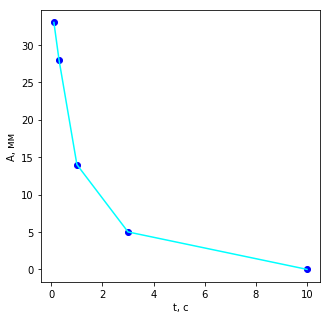

In [18]:
graphic_spline(tad_2['A'][0],tad_2['A'][1], x_label='t, с', y_label = 'A, мм', title='Амплитуда II производной от постоянной времени');

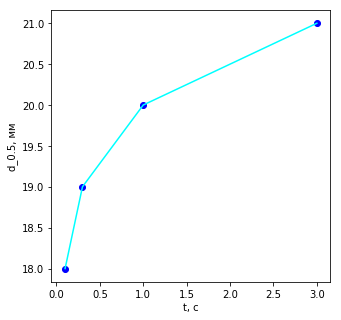

In [19]:
graphic_spline(tad_2['d_0.5'][0],tad_2['d_0.5'][1], x_label='t, с', y_label = 'd_0.5, мм', title='Ширина II производной от постоянной времени');

### <center> Магнитное поле земли

In [20]:
erth_mag = (mag_interpol(43)-mag_interpol(28))/2
erth_mag

0.69851480230478824